# Predicting UV Index based on Weather Data in Iberian Peninsula Cities: A Machine Learning Approach

## Data analysis 

#### Load the all the data from the csv files and add new column to the dataframe

In [3]:
import pandas as pd

# List of city filenames
files = {
    "barcelona": "barcelona.csv",
    "bilbao": "bilbao.csv",
    "lisbon": "lisbon.csv",
    "madrid": "madrid.csv",
    "malaga": "malaga.csv",
    "porto": "porto.csv",
    "sevilla": "sevilla.csv",
    "valencia": "valencia.csv",
    "vigo": "vigo.csv",
    "zaragoza": "zaragoza.csv"
}

# Load each dataset and add a city column
dataframes = []

for city, file in files.items():
    df = pd.read_csv(file)
    df['city'] = city
    dataframes.append(df)

# Combine all dataframes
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.head()


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,city
0,2008-07-01,27,22,0.0,14.5,6,6,4,04:04 AM,08:20 PM,...,19,8,63,0.0,1015,27,10,248,12,barcelona
1,2008-07-02,25,19,0.0,14.5,6,6,0,05:07 AM,09:23 PM,...,11,6,78,0.0,1012,25,10,218,9,barcelona
2,2008-07-03,25,20,0.0,14.5,6,6,0,06:21 AM,10:12 PM,...,14,22,73,0.0,1012,25,10,164,11,barcelona
3,2008-07-04,25,19,0.0,14.5,6,6,3,07:41 AM,10:51 PM,...,22,5,68,0.0,1017,25,10,186,16,barcelona
4,2008-07-05,27,20,0.0,14.5,6,6,10,08:59 AM,11:21 PM,...,18,5,74,0.0,1014,27,10,232,14,barcelona


#### Convert to the correct data type and add new column to the dataframe 

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns


# Convert the 'datetime' column to datetime objects 
combined_df['date_time'] = pd.to_datetime(combined_df['date_time'])

# Extract the year and the month into separate columns
combined_df['year'] = combined_df['date_time'].dt.year
combined_df['month'] = combined_df['date_time'].dt.month

# Group by city, year, and month to compute the mean for key features
monthly_aggregated = combined_df.groupby(['city', 'year', 'month']).agg({
    'uvIndex': 'mean',
    'maxtempC': 'mean',
    'mintempC': 'mean',
    'precipMM': 'mean'
}).reset_index()

#### 3 cities chosen to analyse the sesonal variations of UV Index

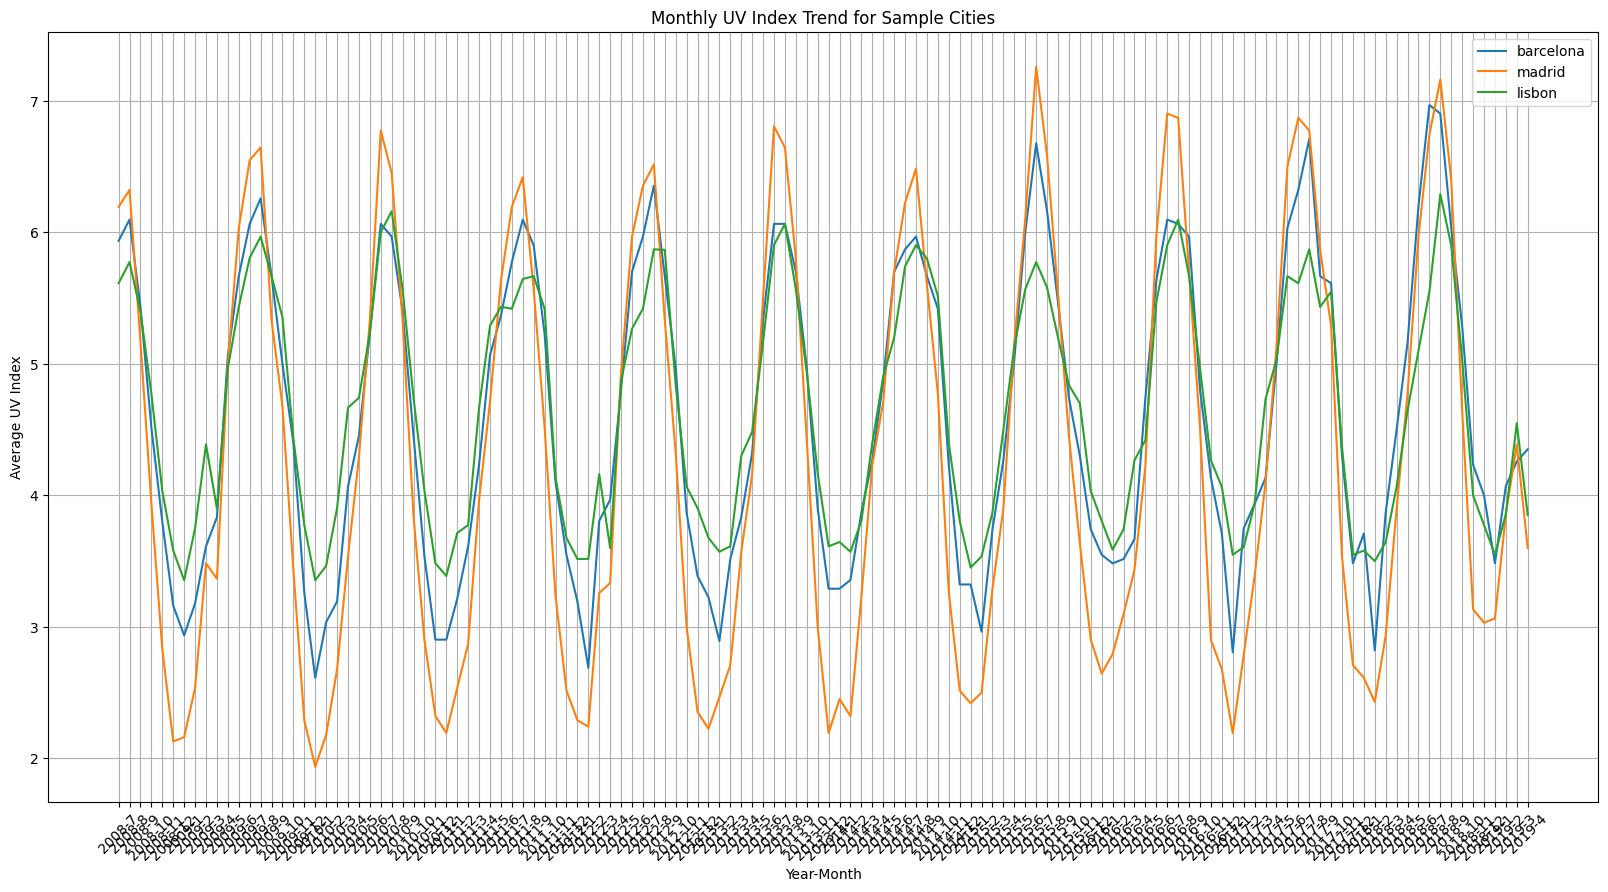

In [5]:
sample_cities = ['barcelona', 'madrid', 'lisbon']

# UV Index Trend
plt.figure(figsize=(20, 10))
for city in sample_cities:
    city_data = monthly_aggregated[monthly_aggregated['city'] == city]
    plt.plot(city_data['year'].astype(str) + "-" + city_data['month'].astype(str), city_data['uvIndex'], label=city)
plt.title('Monthly UV Index Trend for Sample Cities')
plt.xlabel('Year-Month')
plt.ylabel('Average UV Index')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Visualisation of the distribuition of montly average UV index 
#### Visualisation of the distribution of Monthly Average Max Temperature
#### Visualisation of the distribution of Monthly Average Precipitation


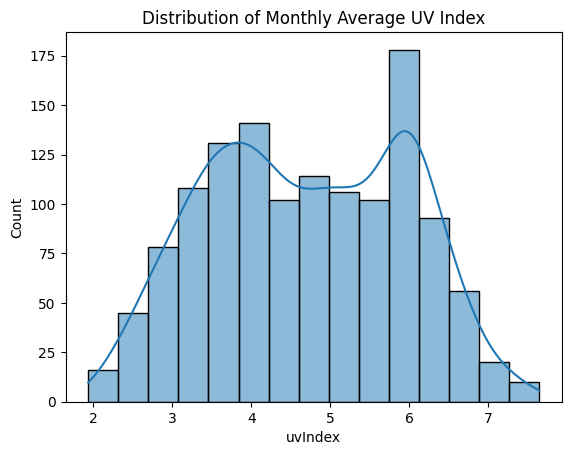

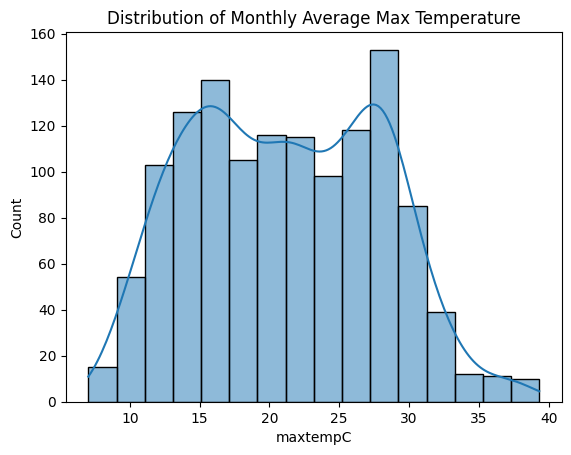

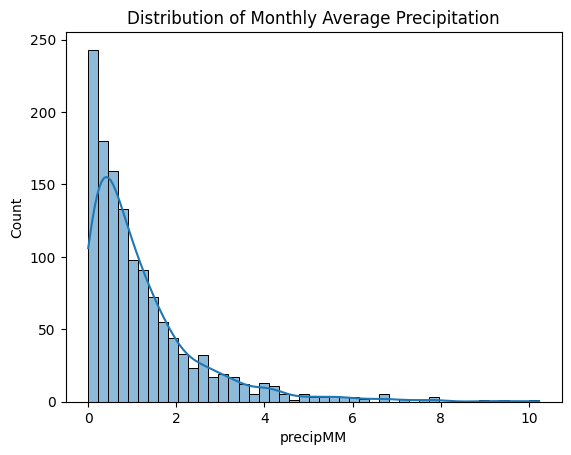

In [6]:
# Distribution of UV Index
sns.histplot(monthly_aggregated['uvIndex'], kde=True)
plt.title('Distribution of Monthly Average UV Index')
plt.show()

# Distribution of Max Temperature
sns.histplot(monthly_aggregated['maxtempC'], kde=True)
plt.title('Distribution of Monthly Average Max Temperature')
plt.show()

# Distribution of Precipitation
sns.histplot(monthly_aggregated['precipMM'], kde=True)
plt.title('Distribution of Monthly Average Precipitation')
plt.show()

#### Correlation matrix

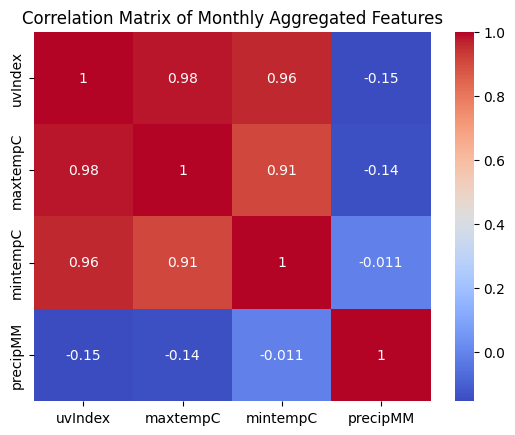

In [7]:
correlation_matrix = monthly_aggregated[['uvIndex', 'maxtempC', 'mintempC', 'precipMM']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Monthly Aggregated Features')
plt.show()


#### Detection of outliers: Boxplot

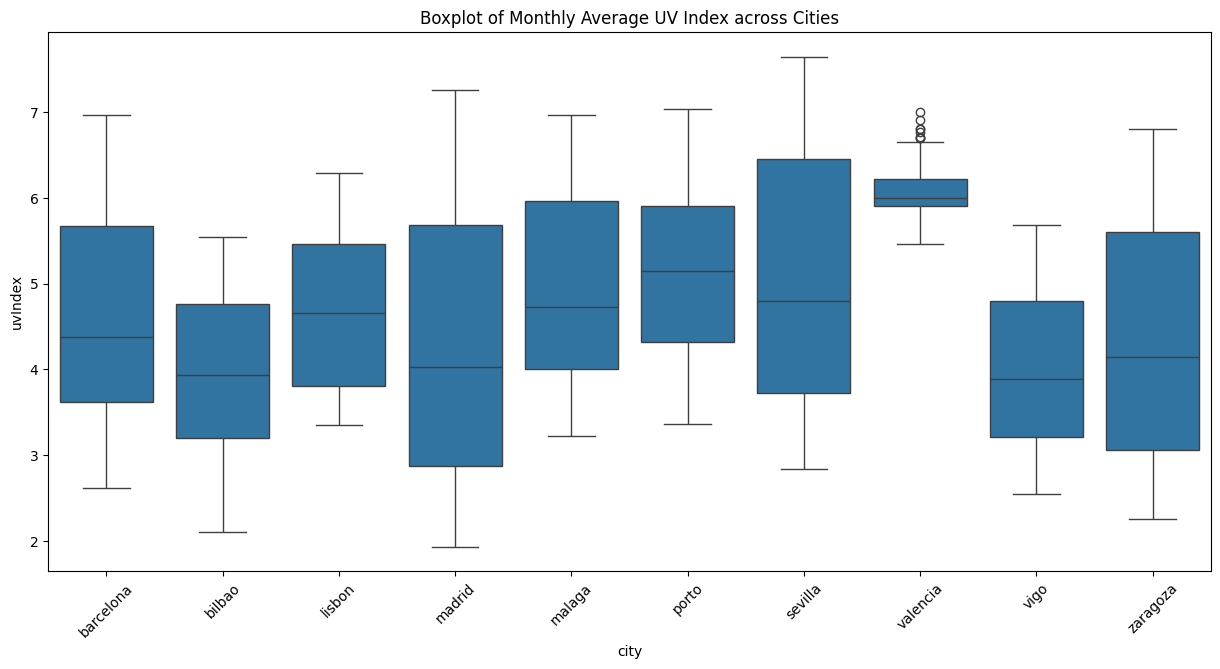

In [8]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=monthly_aggregated, x='city', y='uvIndex')
plt.title('Boxplot of Monthly Average UV Index across Cities')
plt.xticks(rotation=45)
plt.show()


#### Yearly trends of UV Index

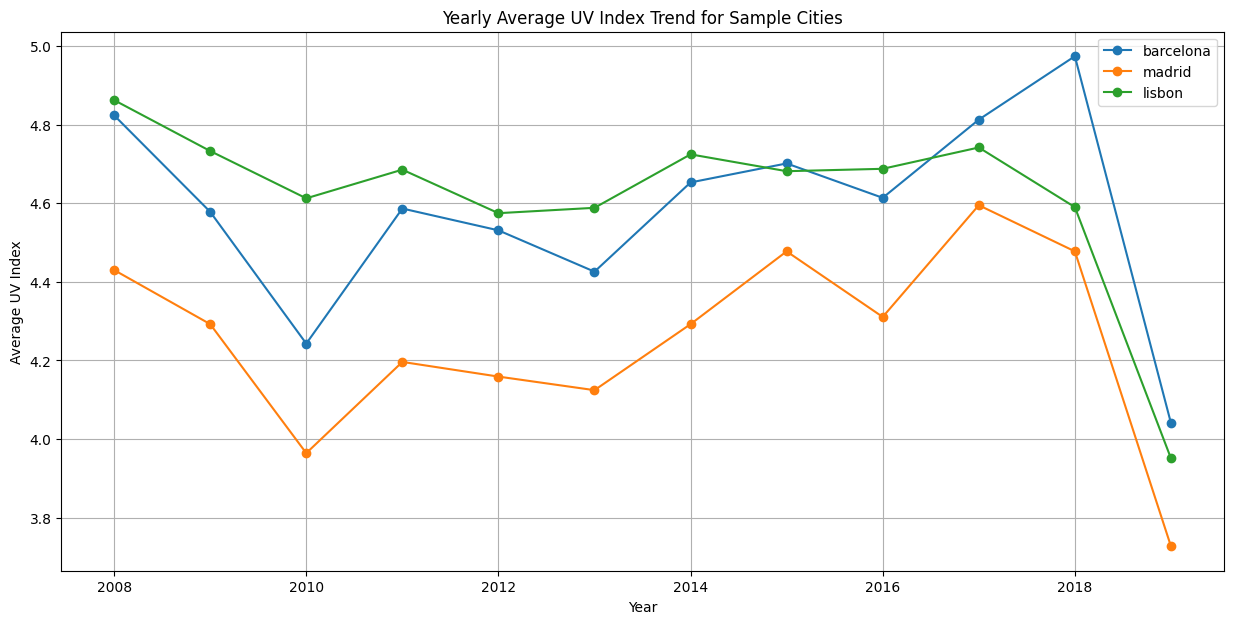

In [9]:
yearly_aggregated = monthly_aggregated.groupby(['city', 'year']).agg({'uvIndex': 'mean'}).reset_index()

plt.figure(figsize=(15, 7))
for city in sample_cities:
    city_data = yearly_aggregated[yearly_aggregated['city'] == city]
    plt.plot(city_data['year'], city_data['uvIndex'], label=city, marker='o')
plt.title('Yearly Average UV Index Trend for Sample Cities')
plt.xlabel('Year')
plt.ylabel('Average UV Index')
plt.legend()
plt.grid(True)
plt.show()


#### Pair plot of the variables

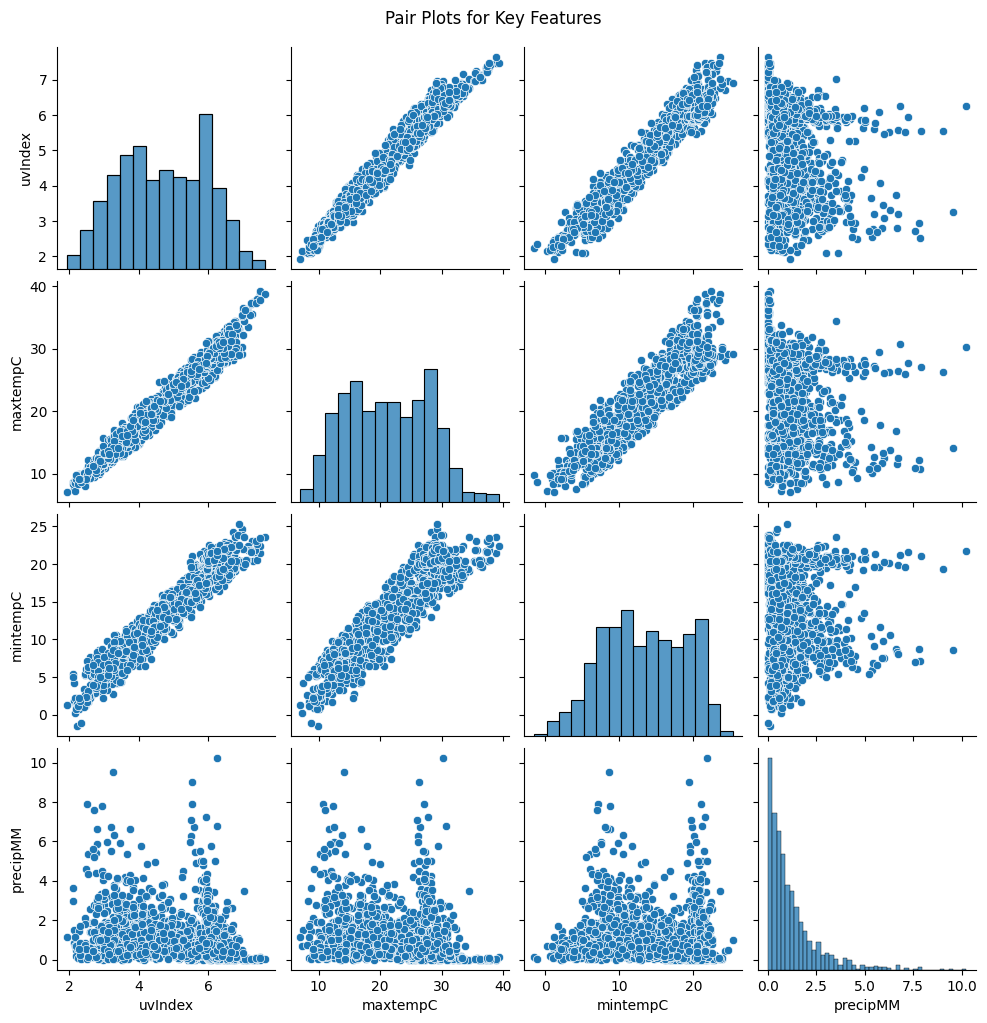

In [10]:
sns.pairplot(monthly_aggregated[['uvIndex', 'maxtempC', 'mintempC', 'precipMM']])
plt.suptitle('Pair Plots for Key Features', y=1.02)
plt.show()


## Data Pre-processing

#### Checking for missing values

In [11]:
# Checking for missing data
missing_data = combined_df.isnull().sum()

missing_data


date_time            0
maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
city                 0
year                 0
month                0
dtype: int64

#### Identifying outliers

In [12]:
# Identifying outliers for uvIndex using IQR method

Q1 = combined_df['uvIndex'].quantile(0.25)
Q3 = combined_df['uvIndex'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_df[(combined_df['uvIndex'] < lower_bound) | (combined_df['uvIndex'] > upper_bound)]

# Count of outliers
outliers_count = outliers.shape[0]

outliers_count


0

#### Check for Valencia outliers

In [13]:
# Identifying outliers for uvIndex in Valencia using IQR method

valencia_data = combined_df[combined_df['city'] == 'valencia']

Q1 = valencia_data['uvIndex'].quantile(0.25)
Q3 = valencia_data['uvIndex'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_valencia = valencia_data[(valencia_data['uvIndex'] < lower_bound) | (valencia_data['uvIndex'] > upper_bound)]

# Count and details of outliers
outliers_count_valencia = outliers_valencia.shape[0]
outliers_details_valencia = outliers_valencia[['date_time', 'uvIndex']]


print("Number of outliers for Valencia:", outliers_count_valencia)
print("\nDetails of outliers for Valencia:")
print(outliers_details_valencia)


Number of outliers for Valencia: 987

Details of outliers for Valencia:
       date_time  uvIndex
27622 2008-07-01        5
27623 2008-07-02        5
27627 2008-07-06        5
27636 2008-07-15        5
27637 2008-07-16        5
...          ...      ...
31553 2019-04-06        7
31556 2019-04-09        7
31558 2019-04-11        7
31559 2019-04-12        7
31565 2019-04-18        5

[987 rows x 2 columns]


#### Temporal Balance 

In [14]:
# 1. Temporal Balance: Distribution across different months
month_distribution = combined_df.groupby('month').size()

# 2. City Balance: Distribution across different cities
city_distribution = combined_df.groupby('city').size()

month_distribution, city_distribution


(month
 1     3410
 2     3100
 3     3410
 4     3200
 5     3100
 6     3000
 7     3410
 8     3410
 9     3300
 10    3410
 11    3300
 12    3410
 dtype: int64,
 city
 barcelona    3946
 bilbao       3946
 lisbon       3946
 madrid       3946
 malaga       3946
 porto        3946
 sevilla      3946
 valencia     3946
 vigo         3946
 zaragoza     3946
 dtype: int64)

#### Analyse the distribution of the UV Index

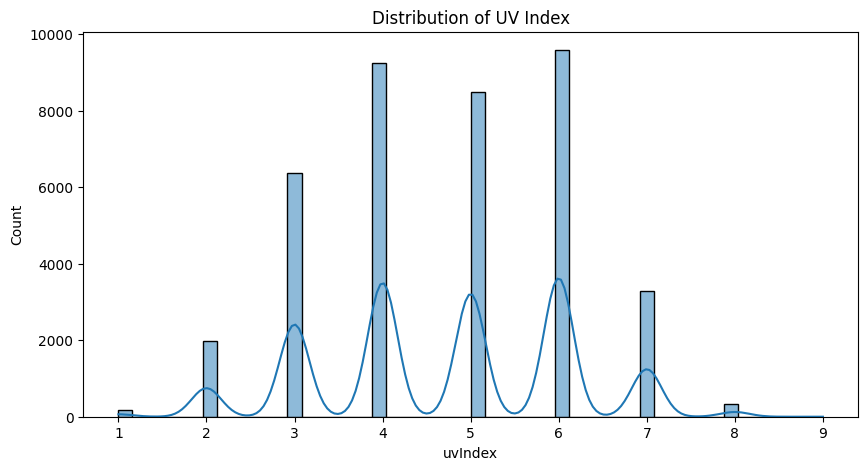

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(combined_df['uvIndex'], bins=50, kde=True)
plt.title('Distribution of UV Index')
plt.show()


#### Encode the categorical variables

In [16]:
# Applying one-hot encoding to the 'city' column
encoded_df = pd.get_dummies(combined_df, columns=['city'], drop_first=True)

# Displaying random columns of the dataset
encoded_df.loc[20000:20005]

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,month,city_bilbao,city_lisbon,city_madrid,city_malaga,city_porto,city_sevilla,city_valencia,city_vigo,city_zaragoza
20000,2009-03-28,30,19,0.0,11.6,6,6,12,08:28 AM,07:25 PM,...,3,False,False,False,False,True,False,False,False,False
20001,2009-03-29,32,18,0.0,11.6,6,6,19,09:35 AM,08:08 PM,...,3,False,False,False,False,True,False,False,False,False
20002,2009-03-30,32,17,0.0,11.6,6,6,26,10:42 AM,08:59 PM,...,3,False,False,False,False,True,False,False,False,False
20003,2009-03-31,31,20,0.0,11.6,6,6,30,11:49 AM,09:57 PM,...,3,False,False,False,False,True,False,False,False,False
20004,2009-04-01,23,18,0.0,8.8,6,6,42,12:50 PM,11:01 PM,...,4,False,False,False,False,True,False,False,False,False
20005,2009-04-02,22,13,0.0,10.2,5,5,50,01:45 PM,No moonset,...,4,False,False,False,False,True,False,False,False,False


#### Check for Duplicate Values 

In [17]:
all_equal = (encoded_df['uvIndex'] == encoded_df['uvIndex.1']).all()
print(all_equal)


True


In [18]:
encoded_df.drop('uvIndex.1', axis=1, inplace=True)


In [19]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39460 entries, 0 to 39459
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          39460 non-null  datetime64[ns]
 1   maxtempC           39460 non-null  int64         
 2   mintempC           39460 non-null  int64         
 3   totalSnow_cm       39460 non-null  float64       
 4   sunHour            39460 non-null  float64       
 5   uvIndex            39460 non-null  int64         
 6   moon_illumination  39460 non-null  int64         
 7   moonrise           39460 non-null  object        
 8   moonset            39460 non-null  object        
 9   sunrise            39460 non-null  object        
 10  sunset             39460 non-null  object        
 11  DewPointC          39460 non-null  int64         
 12  FeelsLikeC         39460 non-null  int64         
 13  HeatIndexC         39460 non-null  int64         
 14  WindCh

## Random Forest Regressor Without Tuning

#### Data Splitting and Feature Selection

In [35]:
from sklearn.model_selection import train_test_split

# Define predictors and target variable
columns_to_drop = ['date_time', 'moonrise', 'moonset', 'sunrise', 'sunset']
X = encoded_df.drop(columns=columns_to_drop + ['uvIndex'])
y = encoded_df['uvIndex']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate the Mean Absolute Error and Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 0.16277566539923952
Root Mean Squared Error (RMSE): 0.2922541647803025
R^2 Score: 0.955680954404099


## Random Forest with Tunning Parameters

### 1. Randomized Search 

#### Dataset Splitting & Feature Selection & Train the model & Performance Evaluation

In [41]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Take a random sample of 30% of the dataset
sample_df = encoded_df.sample(frac=0.3, random_state=42)

# Define predictors and target variable for the sample
X_sample = sample_df.drop(columns=['date_time', 'uvIndex', 'moonrise', 'moonset', 'sunrise', 'sunset'])
y_sample = sample_df['uvIndex']

# Split the sampled dataset into training and testing sets (80% train, 20% test)
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Same parameter distributions
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                   n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# Fit the model to the sampled data
random_search.fit(X_train_sample, y_train_sample)

# Get the best parameters
best_params_random = random_search.best_params_
print(f"Best Parameters (Randomized): {best_params_random}")

# Evaluate the best model from randomized search on the sampled test data
best_rf_random = random_search.best_estimator_
y_pred_best_random = best_rf_random.predict(X_test_sample)
mae_best_random = mean_absolute_error(y_test_sample, y_pred_best_random)
rmse_best_random = mean_squared_error(y_test_sample, y_pred_best_random, squared=False)
print(f"MAE (Best Model from Randomized Search): {mae_best_random}")
print(f"RMSE (Best Model from Randomized Search): {rmse_best_random}")



Fitting 3 folds for each of 20 candidates, totalling 60 fits


[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=10

### 2. Grid Search

#### Dataset Splitting & Feature Selection 

In [43]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with n_jobs=-1 to utilize all cores
grid_search_sample = GridSearchCV(estimator=rf, param_grid=param_grid, 
                                  cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model to the sampled data
grid_search_sample.fit(X_train_sample, y_train_sample)

# Get the best parameters from the grid search on the sampled data
best_params_sample = grid_search_sample.best_params_
print(f"Best Parameters (Sampled Data): {best_params_sample}")

# Evaluate the best model from grid search on the sampled test data
best_rf_sample = grid_search_sample.best_estimator_
y_pred_best_sample = best_rf_sample.predict(X_test_sample)
mae_best_sample = mean_absolute_error(y_test_sample, y_pred_best_sample)
rmse_best_sample = mean_squared_error(y_test_sample, y_pred_best_sample, squared=False)
print(f"MAE (Best Model from Grid Search on Sampled Data): {mae_best_sample}")
print(f"RMSE (Best Model from Grid Search on Sampled Data): {rmse_best_sample}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.0s
[CV] END max_dep

#### Train the model 

In [44]:
# Initialize Random Forest with the best hyperparameters found
best_rf_full = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=None, random_state=42)

# Fit the model to the full training data
best_rf_full.fit(X_train, y_train)


RandomForestRegressor(min_samples_leaf=2, n_estimators=200, random_state=42)

#### Performance Evaluation

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict using the test set
y_pred_full = best_rf_full.predict(X_test)

# Compute R^2 score
r2_full = r2_score(y_test, y_pred_full)

# Compute MAE
mae_full = mean_absolute_error(y_test, y_pred_full)

# Compute RMSE
rmse_full = mean_squared_error(y_test, y_pred_full, squared=False)

print(f"R^2 Score (Using Optimal Hyperparameters on Full Data): {r2_full}")
print(f"MAE (Using Optimal Hyperparameters on Full Data): {mae_full}")
print(f"RMSE (Using Optimal Hyperparameters on Full Data): {rmse_full}")



R^2 Score (Using Optimal Hyperparameters on Full Data): 0.9560543848525676
MAE (Using Optimal Hyperparameters on Full Data): 0.16225131436124782
RMSE (Using Optimal Hyperparameters on Full Data): 0.2910202993940561


### Comparison of the models (without tunning parameters, with Randomized Search and with Grid Search)

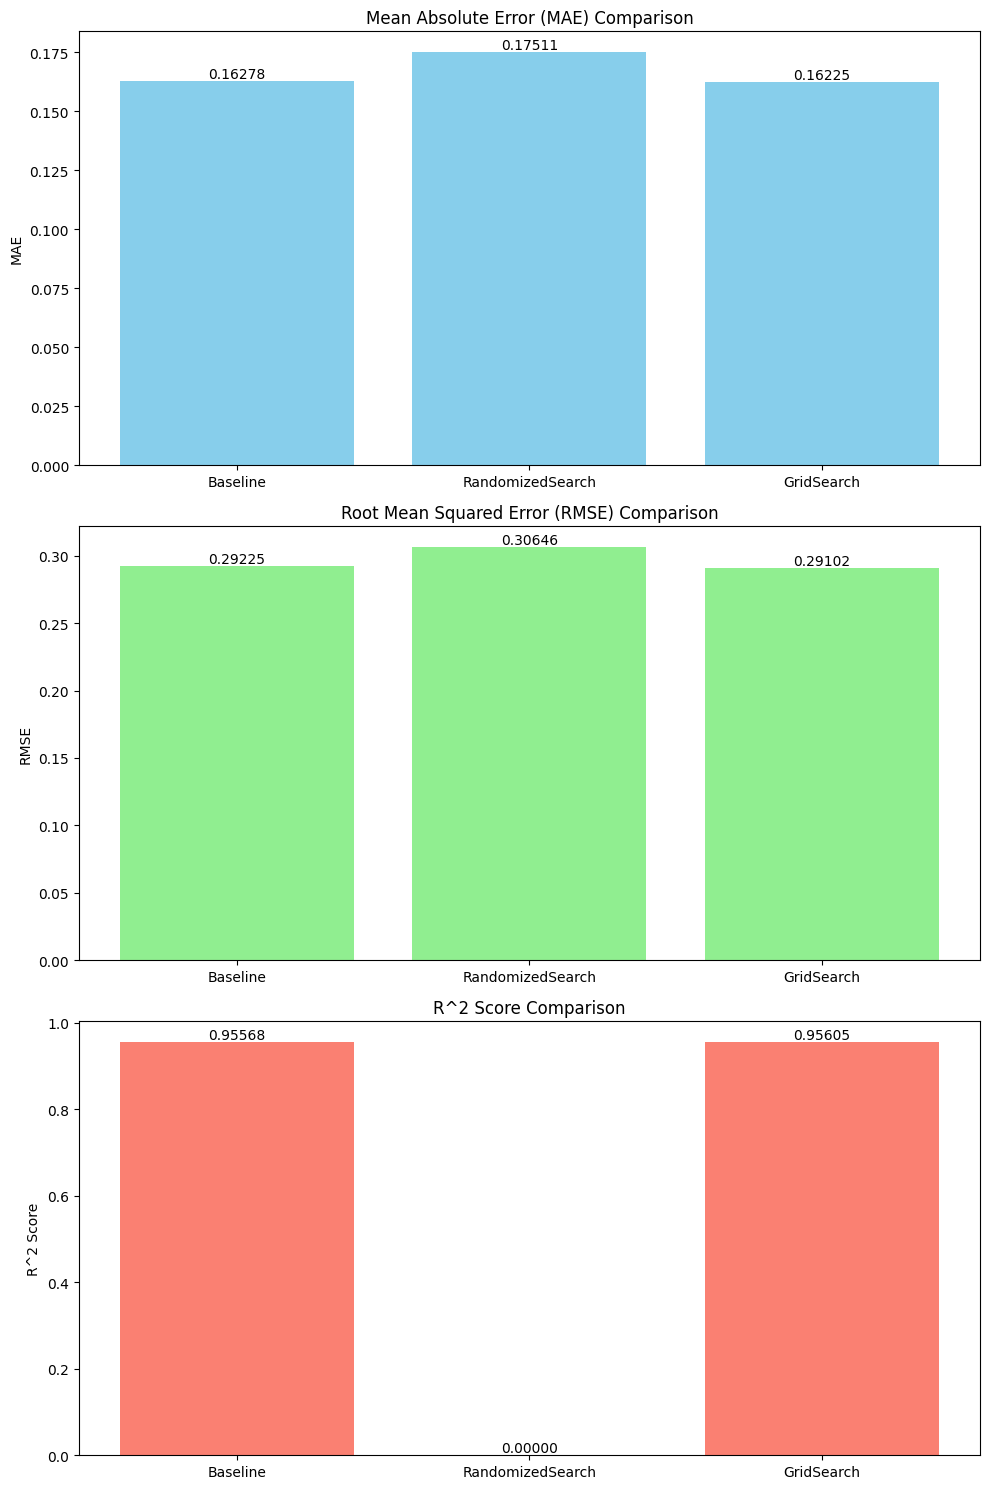

In [9]:
import matplotlib.pyplot as plt

# Defining the data for the baseline, randomized search, and grid search models
metrics = {
    'Baseline': {'MAE': 0.16278, 'RMSE': 0.29225, 'R^2': 0.95568},  
    'RandomizedSearch': {'MAE': 0.17511, 'RMSE': 0.30646, 'R^2': 0},  
    'GridSearch': {'MAE': 0.16225, 'RMSE': 0.29102, 'R^2': 0.95605}
}


# Lists to hold the metric values for plotting
mae_values = [metrics[model]['MAE'] for model in metrics]
rmse_values = [metrics[model]['RMSE'] for model in metrics]
r2_values = [metrics[model]['R^2'] for model in metrics]

# X-axis labels
models = list(metrics.keys())

# Plotting the MAE, RMSE, and R^2 for each model in subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# MAE subplot
axs[0].bar(models, mae_values, color='skyblue')
axs[0].set_title('Mean Absolute Error (MAE) Comparison')
axs[0].set_ylabel('MAE')
for i, v in enumerate(mae_values):
    axs[0].text(i, v , "{:.5f}".format(v), ha='center', va='bottom')

# RMSE subplot
axs[1].bar(models, rmse_values, color='lightgreen')
axs[1].set_title('Root Mean Squared Error (RMSE) Comparison')
axs[1].set_ylabel('RMSE')
for i, v in enumerate(rmse_values):
    axs[1].text(i, v , "{:.5f}".format(v), ha='center', va='bottom')

# R^2 subplot
axs[2].bar(models, r2_values, color='salmon')
axs[2].set_title('R^2 Score Comparison')
axs[2].set_ylabel('R^2 Score')
for i, v in enumerate(r2_values):
    axs[2].text(i, v , "{:.5f}".format(v), ha='center', va='bottom')

# Layout adjustments
plt.tight_layout()

# Show plot
plt.show()


#### Check for Overfitting

In [47]:
# Predict on the training set
y_pred_train = best_rf_full.predict(X_train)

# Compute metrics for the training set
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)

# Print metrics for training data
print(f"R^2 Score (Training Data): {r2_train}")
print(f"MAE (Training Data): {mae_train}")
print(f"RMSE (Training Data): {rmse_train}")

# Print metrics for test data (for comparison)
print("\n")
print(f"R^2 Score (Test Data): {r2_full}")
print(f"MAE (Test Data): {mae_full}")
print(f"RMSE (Test Data): {rmse_full}")


R^2 Score (Training Data): 0.9893770108337557
MAE (Training Data): 0.07993546885887667
RMSE (Training Data): 0.14485644869195466


R^2 Score (Test Data): 0.9560543848525676
MAE (Test Data): 0.16225131436124782
RMSE (Test Data): 0.2910202993940561


#### Cross Validation

In [48]:
from sklearn.model_selection import cross_val_score
best_rf_full = RandomForestRegressor(n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=None, random_state=42)
# Let's use 5-fold cross-validation as an example
scores = cross_val_score(best_rf_full, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print("Cross-validated R^2 scores:", scores)
print("Mean R^2:", scores.mean())
print("Standard Deviation of R^2:", scores.std())


Cross-validated R^2 scores: [0.95630219 0.95582712 0.95578593 0.95591293 0.95431561]
Mean R^2: 0.9556287563051775
Standard Deviation of R^2: 0.0006815669833677311


#### Compare the number of trees with the performance

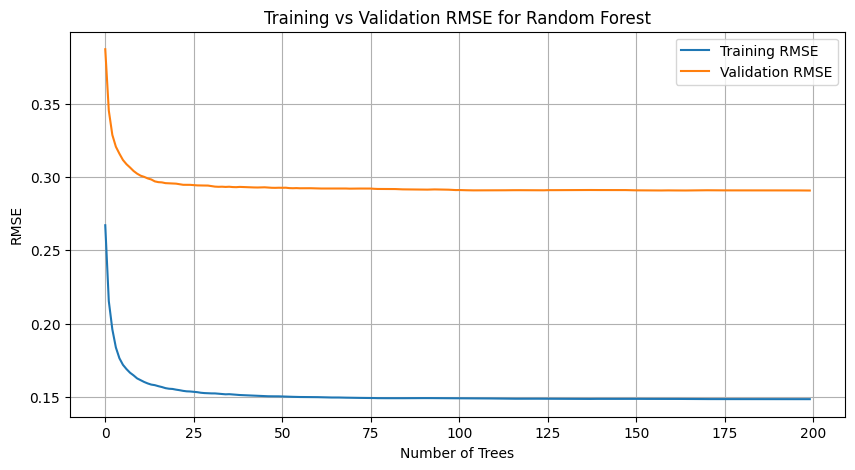

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Best parameters from your tuning
best_params = {
    'max_depth': 20,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 1,
    'warm_start': True
}

# Create a random forest regressor with these parameters
rf = RandomForestRegressor(**best_params)

# Lists to hold the RMSE values for each iteration
train_errors = []
test_errors = []

# Train the model incrementally and record the errors
for i in range(1, 201):  # Assuming you want to go up to 200 trees
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    train_errors.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, test_pred)))
    
    # Increment the number of trees for the next iteration
    rf.set_params(n_estimators=i+1)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_errors, label='Training RMSE')
plt.plot(test_errors, label='Validation RMSE')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.title('Training vs Validation RMSE for Random Forest')
plt.legend()
plt.grid(True)
plt.show()





## Gradient Boost (XGBoost) Without Tunning 

#### Dataset Splitting & Feature Selection 

In [41]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
columns_to_drop = ['date_time', 'moonrise', 'moonset', 'sunrise', 'sunset']
X = encoded_df.drop(columns=columns_to_drop + ['uvIndex'])
y = encoded_df['uvIndex'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
encoded_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,month,city_bilbao,city_lisbon,city_madrid,city_malaga,city_porto,city_sevilla,city_valencia,city_vigo,city_zaragoza
0,2008-07-01,27,22,0.0,14.5,6,4,04:04 AM,08:20 PM,06:21 AM,...,7,False,False,False,False,False,False,False,False,False
1,2008-07-02,25,19,0.0,14.5,6,0,05:07 AM,09:23 PM,06:22 AM,...,7,False,False,False,False,False,False,False,False,False
2,2008-07-03,25,20,0.0,14.5,6,0,06:21 AM,10:12 PM,06:23 AM,...,7,False,False,False,False,False,False,False,False,False
3,2008-07-04,25,19,0.0,14.5,6,3,07:41 AM,10:51 PM,06:23 AM,...,7,False,False,False,False,False,False,False,False,False
4,2008-07-05,27,20,0.0,14.5,6,10,08:59 AM,11:21 PM,06:24 AM,...,7,False,False,False,False,False,False,False,False,False


#### Train the model & Performance Evaluation

In [43]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the regressor 
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 0.19072083938532655
Root Mean Squared Error (RMSE): 0.30000466501843476
R^2 Score: 0.9539809869707937


## Gradient Boost (XGBoost) With Tunning

### 1. Randomized Search

#### Cross Validation & Train the model & Performance Evaluation

In [44]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_distributions = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': np.arange(3, 10),
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0]
}

# Create a new XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions=param_distributions, 
    n_iter=50, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1, 
    cv=5, 
    verbose=3, 
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the best model
best_xgb_model = random_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f"MAE (Best Model): {mae_best}")
print(f"RMSE (Best Model): {rmse_best}")
print(f"R^2 Score (Best Model): {r2_best}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 2/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=8, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8;, score=-0.087 total time=   0.8s
[CV 1/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=8, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8;, score=-0.086 total time=   0.8s
[CV 3/5] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=8, n_estimators=100, reg_alpha=0, reg_lambda=1.0, subsample=0.8;, score=-0.083 total time=   0.8s
[CV 5/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=9, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.9;, score=-0.084 total time=   1.3s
[CV 2/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=9, n_estimators=300, reg_alpha=0.1, reg_lambda=10.0, subsample=0.9;, score=-0.086 total time=   1.3s
[CV 3/5] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.

#### Feature Importance

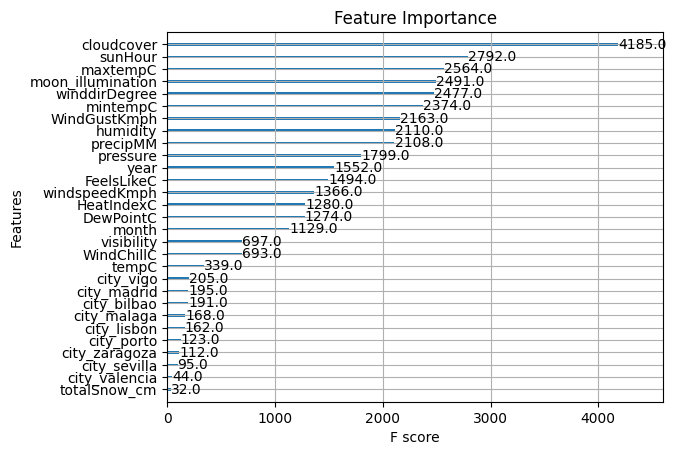

In [45]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(best_xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

In [9]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39460 entries, 0 to 39459
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          39460 non-null  object 
 1   maxtempC           39460 non-null  int64  
 2   mintempC           39460 non-null  int64  
 3   totalSnow_cm       39460 non-null  float64
 4   sunHour            39460 non-null  float64
 5   uvIndex            39460 non-null  int64  
 6   uvIndex.1          39460 non-null  int64  
 7   moon_illumination  39460 non-null  int64  
 8   moonrise           39460 non-null  object 
 9   moonset            39460 non-null  object 
 10  sunrise            39460 non-null  object 
 11  sunset             39460 non-null  object 
 12  DewPointC          39460 non-null  int64  
 13  FeelsLikeC         39460 non-null  int64  
 14  HeatIndexC         39460 non-null  int64  
 15  WindChillC         39460 non-null  int64  
 16  WindGustKmph       394

In [47]:
selected_features = ['cloudcover', 'sunHour', 'maxtempC', 'moon_illumination', 'winddirDegree']
encoded_df_selected = encoded_df[selected_features]


### 2. Bayesian Optimization

#### Cross Validation & Optimization 

In [48]:
from bayes_opt import BayesianOptimization
import xgboost as xgb

# Define the function to be optimized
def xgb_evaluate(max_depth, gamma, colsample_bytree, learning_rate, subsample, min_child_weight, reg_alpha):
    params = {
        'max_depth': int(max_depth),
        'gamma': gamma,
        'colsample_bytree': colsample_bytree,
        'subsample': subsample,
        'min_child_weight': min_child_weight,
        'reg_alpha': reg_alpha,
        'learning_rate': learning_rate,
        'objective': 'reg:squarederror'
    }
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, early_stopping_rounds=10)
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]


# Convert the training data into DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)

# Bayesian Optimization
xgb_bo = BayesianOptimization(xgb_evaluate, {
    'max_depth': (3, 10), 
    'gamma': (0, 1),
    'colsample_bytree': (0.3, 1),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.5, 1),
    'min_child_weight': (1, 10),
    'reg_alpha': (0, 1)
})
xgb_bo.maximize(init_points=10, n_iter=20)



|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | reg_alpha | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | -0.2956   | 0.9358    | 0.4888    | 0.2213    | 9.436     | 1.224     | 0.9078    | 0.8956    |
| 2         | -0.3025   | 0.5834    | 0.4939    | 0.2223    | 9.917     | 9.489     | 0.4525    | 0.7618    |
| 3         | -0.5127   | 0.6311    | 0.9862    | 0.01222   | 9.798     | 6.056     | 0.2229    | 0.5132    |
| 4         | -0.298    | 0.878     | 0.4301    | 0.03338   | 9.015     | 1.757     | 0.7027    | 0.7225    |
| 5         | -0.3026   | 0.7022    | 0.7271    | 0.2358    | 7.909     | 3.085     | 0.6543    | 0.5179    |
| 6         | -0.3179   | 0.7775    | 0.1209    | 0.02633   | 7.676     | 3.119     | 0.6842    | 0.5276    |
| 7         | -0.2955   | 0.8355    | 0.7193    | 0.1227    | 9.613     | 1.52      | 0.2098    | 0.6393    |
| 8       

#### Performance Evaluation & Cross Validation 

In [51]:
from sklearn.model_selection import cross_val_score

best_params = xgb_bo.max['params']
best_params['max_depth'] = int(best_params['max_depth'])

# Training using the best parameters
final_model = xgb.XGBRegressor(**best_params)
cross_val_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-validated R^2 scores: {cross_val_scores}")
print(f"Mean R^2: {np.mean(cross_val_scores)}")
print(f"Standard Deviation of R^2: {np.std(cross_val_scores)}")


Cross-validated R^2 scores: [0.9561201  0.95362927 0.9556905  0.95511594 0.95643686]
Mean R^2: 0.9553985331672141
Standard Deviation of R^2: 0.0009893584729288273


#### Data Splitting

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Training vs Validation RMSE 

In [54]:
from sklearn.metrics import mean_squared_error

train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

train_rmse = mean_squared_error(y_train, train_preds, squared=False)
val_rmse = mean_squared_error(y_val, val_preds, squared=False)

print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")


Training RMSE: 0.22256060598581268
Validation RMSE: 0.29686691872247023


#### Visual RMSE vs Training Set Size

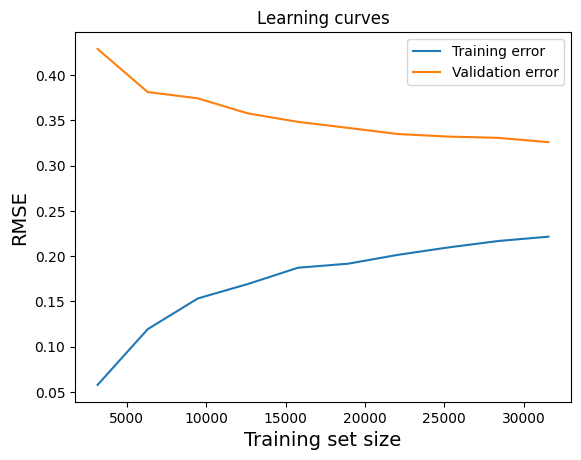

In [55]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    xgb.XGBRegressor(objective ='reg:squarederror'), X, y, cv=5, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1, 10))

train_scores_mean = np.mean(np.sqrt(-train_scores), axis=1)
val_scores_mean = np.mean(np.sqrt(-val_scores), axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, val_scores_mean, label='Validation error')
plt.ylabel('RMSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.legend()
plt.title('Learning curves')
plt.show()


#### L1 and L2 Regularization

In [56]:
model = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=1, reg_lambda=1.5)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Metrics on the Test Set

In [57]:
# Predict with the regularized model on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


RMSE: 0.29601452669621214
MAE: 0.18343355049352264
R^2: 0.9551969755039831


#### L1 and L2 regularization results

/Users/guilhermepestana/Desktop/6006CEM /myenv/lib/python3.11/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


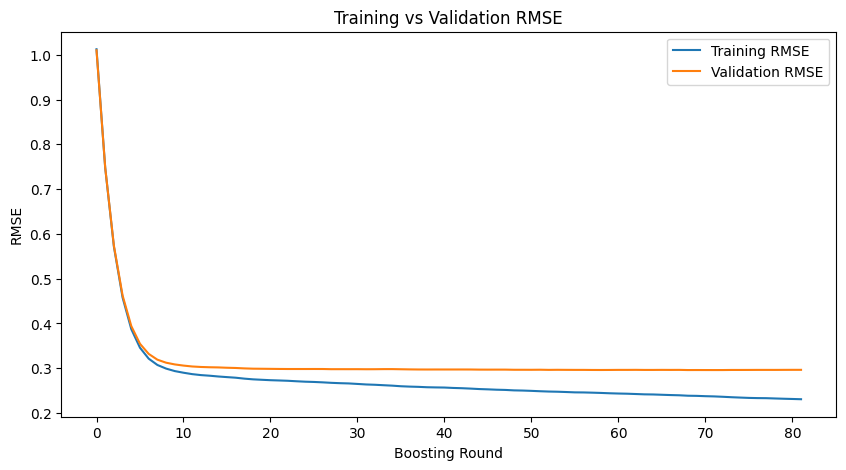

In [58]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'objective': 'reg:squarederror',
    'alpha': 1,
    'lambda': 1.5
}

# Train the model with evaluation data
evals = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 100
evals_result = {}
bst = xgb.train(params, dtrain, num_round, evals, early_stopping_rounds=10, verbose_eval=False, evals_result=evals_result)

# Extract the training and testing RMSE
train_errors = evals_result['train']['rmse']
test_errors = evals_result['eval']['rmse']

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_errors, label='Training RMSE')
plt.plot(test_errors, label='Validation RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('Training vs Validation RMSE')
plt.legend()
plt.show()



### Comparison of the models (without tunning parameters, with Randomized Search and with Bayesian Optimization (L1 and L2 regularization))

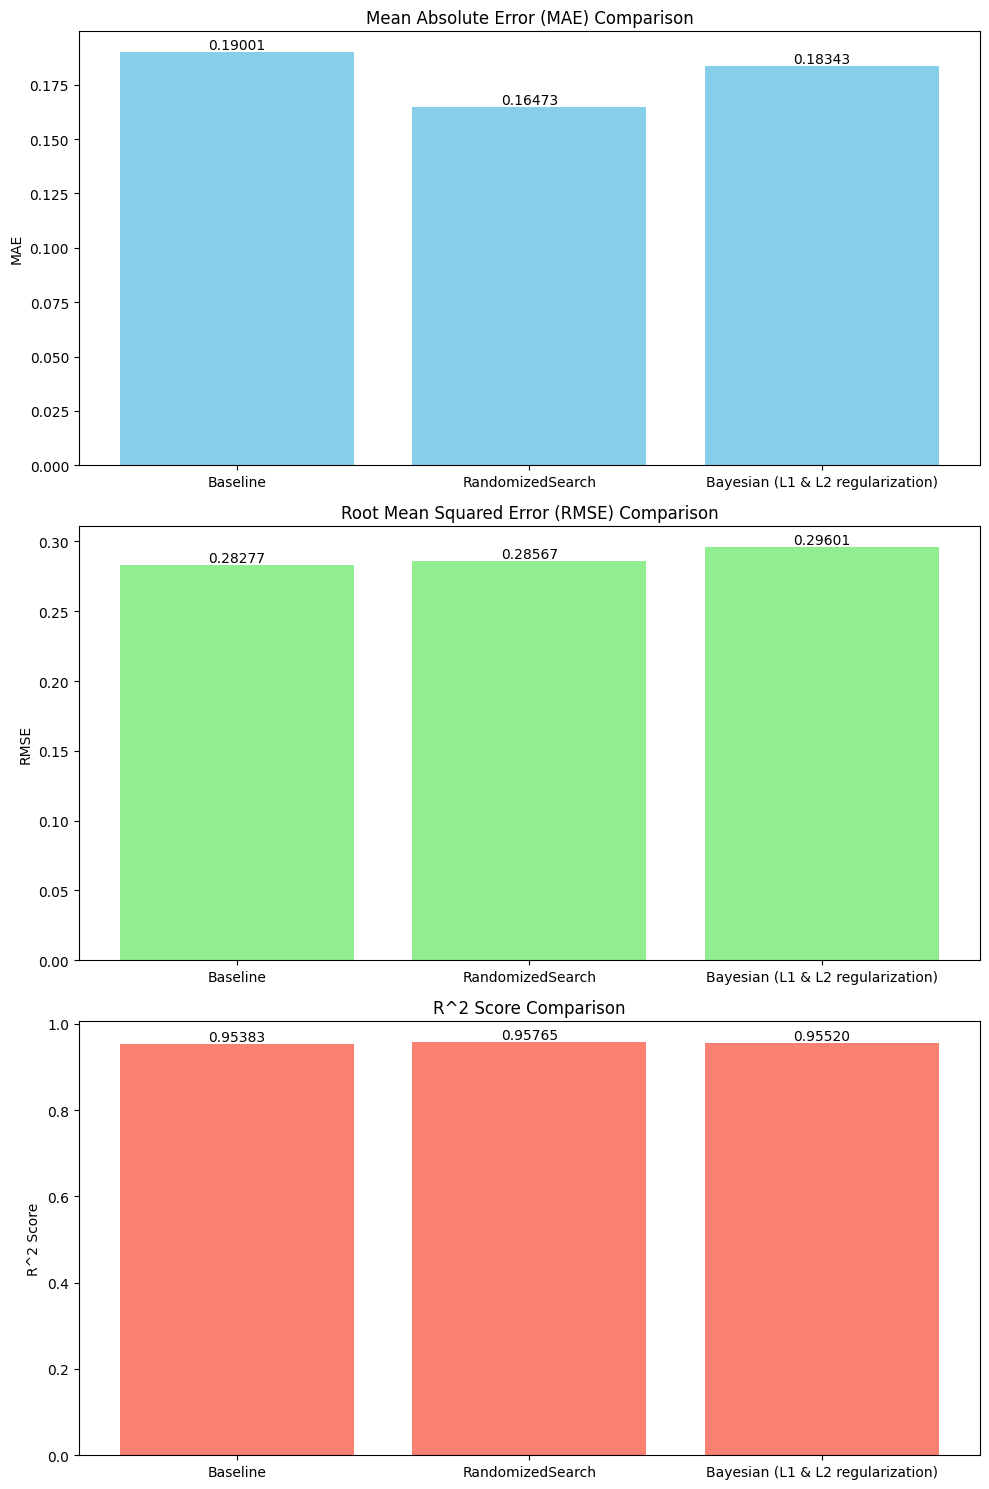

In [59]:
import matplotlib.pyplot as plt

# Defining the data for the baseline, randomized search, and grid search models
metrics = {
    'Baseline': {'MAE': 0.19001, 'RMSE': 0.28277, 'R^2': 0.95383},  
    'RandomizedSearch': {'MAE': 0.16473, 'RMSE': 0.28567, 'R^2': 0.95765},  
    'Bayesian (L1 & L2 regularization)': {'MAE': 0.183433, 'RMSE': 0.29601, 'R^2': 0.95520}
}


# Lists to hold the metric values for plotting
mae_values = [metrics[model]['MAE'] for model in metrics]
rmse_values = [metrics[model]['RMSE'] for model in metrics]
r2_values = [metrics[model]['R^2'] for model in metrics]

# X-axis labels
models = list(metrics.keys())

# Plotting the MAE, RMSE, and R^2 for each model in subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# MAE subplot
axs[0].bar(models, mae_values, color='skyblue')
axs[0].set_title('Mean Absolute Error (MAE) Comparison')
axs[0].set_ylabel('MAE')
for i, v in enumerate(mae_values):
    axs[0].text(i, v , "{:.5f}".format(v), ha='center', va='bottom')

# RMSE subplot
axs[1].bar(models, rmse_values, color='lightgreen')
axs[1].set_title('Root Mean Squared Error (RMSE) Comparison')
axs[1].set_ylabel('RMSE')
for i, v in enumerate(rmse_values):
    axs[1].text(i, v , "{:.5f}".format(v), ha='center', va='bottom')

# R^2 subplot
axs[2].bar(models, r2_values, color='salmon')
axs[2].set_title('R^2 Score Comparison')
axs[2].set_ylabel('R^2 Score')
for i, v in enumerate(r2_values):
    axs[2].text(i, v , "{:.5f}".format(v), ha='center', va='bottom')

# Layout adjustments
plt.tight_layout()

# Show plot
plt.show()


## Support Vector Regression (SVR) Without Tunning

#### Data Splitting & Feature Selection & Standardization

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = encoded_df.drop(columns='uvIndex')
y = encoded_df['uvIndex']

# Split your data into training and testing sets (e.g., 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop the city columns from both training and testing datasets
bool_columns = ['city_bilbao', 'city_lisbon', 'city_madrid', 'city_malaga', 'city_porto', 'city_sevilla', 'city_valencia', 'city_vigo', 'city_zaragoza']
X_train = X_train.drop(columns=bool_columns)
X_test = X_test.drop(columns=bool_columns)

# Standardize the non-boolean features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()



#### Train the model 

In [90]:
from sklearn.svm import SVR

# Train the SVM model
svr = SVR()
svr.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


#### Performance Evaluation

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R^2
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


RMSE: 0.3644282786499198
MAE: 0.2820662362405871
R^2: 0.9310882750337656


## Support Vector Regression (SVR) With Tunning

### 1. Randomized Search

#### Data Reduction & Random Search 

In [100]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR

# Reduce the dataset size for hyperparameter tuning
X_subset, _, y_subset, _ = train_test_split(X_train_scaled, y_train_scaled, test_size=0.7, random_state=42)

# Define a more limited hyperparameter grid
param_distributions = {
    'C': [1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 0.1, 1],
    'epsilon': [0.1, 0.2, 0.3]
}

# Create the base model
svr = SVR()

# Instantiate the random search with reduced cross-validation
random_search = RandomizedSearchCV(svr, param_distributions=param_distributions, 
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_subset, y_subset)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)






Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..............C=1, epsilon=0.3, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..............C=1, epsilon=0.3, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ..............C=1, epsilon=0.3, gamma=1, kernel=rbf; total time=   2.5s
[CV] END ...........C=10, epsilon=0.2, gamma=0.1, kernel=rbf; total time=   4.3s
[CV] END ...........C=10, epsilon=0.2, gamma=0.1, kernel=rbf; total time=   4.3s
[CV] END ...........C=10, epsilon=0.2, gamma=0.1, kernel=rbf; total time=   4.5s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   6.1s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   6.1s
[CV] END ..........C=1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   2.4s
[CV] END ..........C=1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   2.5s
[CV] END ..........C=1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   2.6s
[CV] END .........C=10, epsilon=0.1, gamma=scale

#### Performance Evaluation

In [101]:
# Initialize the SVR model with the best parameters
best_params = {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 1}
svr_best = SVR(**best_params)

# Train the SVR model with the entire training data
svr_best.fit(X_train_scaled, y_train_scaled)

# Predict on the test set
y_pred_scaled = svr_best.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


RMSE: 0.3644282786499198
MAE: 0.2820662362405871
R^2: 0.9310882750337656


### Learning Curves 

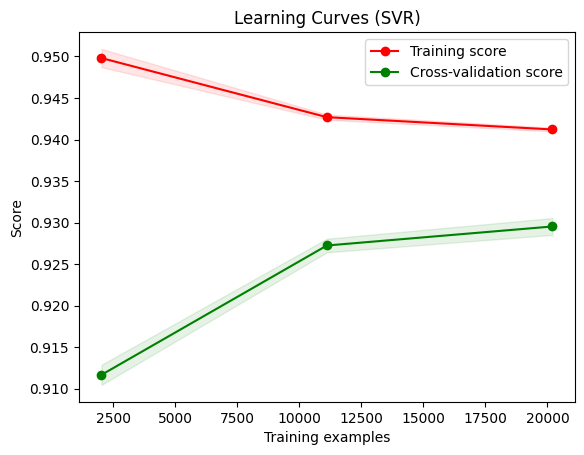

In [107]:
from sklearn.model_selection import learning_curve, train_test_split
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 3)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Sample a subset of the training data for learning curve visualization
sample_fraction = 0.8  # Use 80% of the data for learning curve visualization
X_sample, _, y_sample, _ = train_test_split(X_train_scaled, y_train_scaled, test_size=1-sample_fraction, random_state=42)

title = "Learning Curves (SVR)"
cv = 5  # Number of cross-validation splits
estimator = SVR(kernel='rbf', gamma='scale', epsilon=0.1, C=1)
plot_learning_curve(estimator, title, X_sample, y_sample, cv=cv, n_jobs=-1)
plt.show()


## Comparison of the models (Random Forest, Gradient Boost and Support Vector Regression)

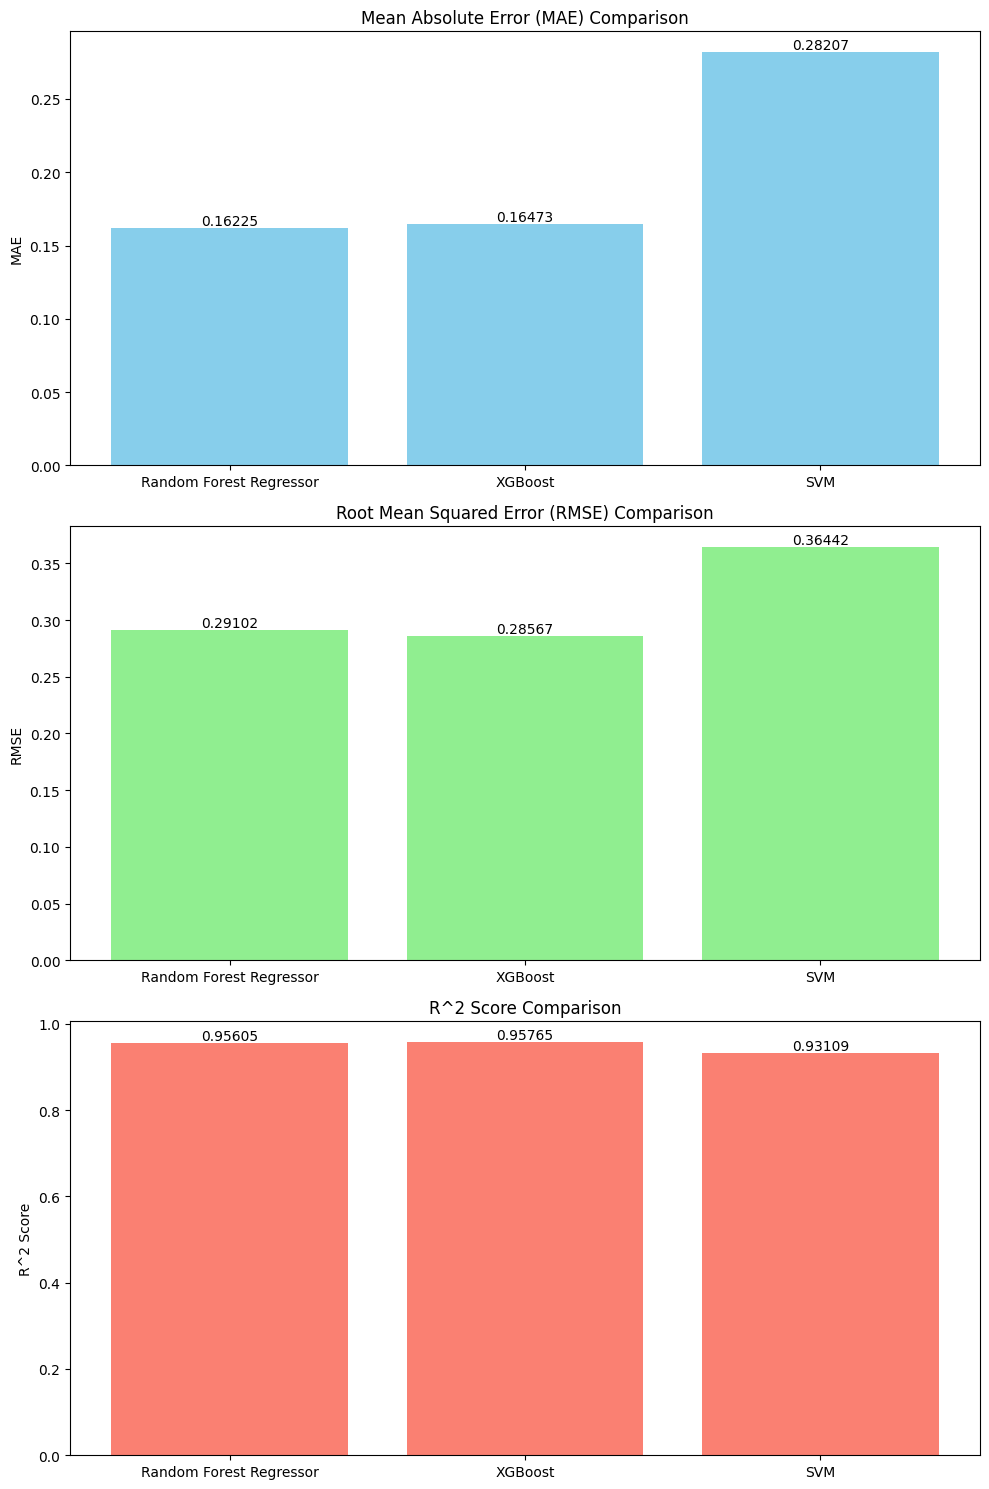

In [60]:
import matplotlib.pyplot as plt

# Defining the data for the baseline, randomized search, and grid search models
metrics = {
    'Random Forest Regressor': {'MAE': 0.16225, 'RMSE': 0.29102, 'R^2': 0.95605},  
    'XGBoost': {'MAE': 0.16473, 'RMSE': 0.28567, 'R^2': 0.95765},  
    'SVM': {'MAE': 0.28207, 'RMSE': 0.36442, 'R^2': 0.93109}
}


# Lists to hold the metric values for plotting
mae_values = [metrics[model]['MAE'] for model in metrics]
rmse_values = [metrics[model]['RMSE'] for model in metrics]
r2_values = [metrics[model]['R^2'] for model in metrics]

# X-axis labels
models = list(metrics.keys())

# Plotting the MAE, RMSE, and R^2 for each model in subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# MAE subplot
axs[0].bar(models, mae_values, color='skyblue')
axs[0].set_title('Mean Absolute Error (MAE) Comparison')
axs[0].set_ylabel('MAE')
for i, v in enumerate(mae_values):
    axs[0].text(i, v , "{:.5f}".format(v), ha='center', va='bottom')

# RMSE subplot
axs[1].bar(models, rmse_values, color='lightgreen')
axs[1].set_title('Root Mean Squared Error (RMSE) Comparison')
axs[1].set_ylabel('RMSE')
for i, v in enumerate(rmse_values):
    axs[1].text(i, v , "{:.5f}".format(v), ha='center', va='bottom')

# R^2 subplot
axs[2].bar(models, r2_values, color='salmon')
axs[2].set_title('R^2 Score Comparison')
axs[2].set_ylabel('R^2 Score')
for i, v in enumerate(r2_values):
    axs[2].text(i, v , "{:.5f}".format(v), ha='center', va='bottom')

# Layout adjustments
plt.tight_layout()

# Show plot
plt.show()